# An End-To-End Analysis of Formula 1 Data

Please read attached report alongside this code, in order to fully understand the thoughts behined it. 

### Importing libraries

In [3]:
# Importintg relevant libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from datetime import timedelta

from datetime import date

import matplotlib.pyplot as plt

### Importing Data and Creating DataFrame

In [4]:
# Creating Dataframes and attaching relevant variables (columns) from .csv files


data = pd.DataFrame()
drivers_data = pd.DataFrame()

# Importing .csv
results = pd.read_csv("results.csv")
drivers = pd.read_csv("drivers.csv")

# From results.csv
data["raceId"] = results["raceId"]
data["position"] = results["position"]
data["grid"] = results["grid"]
data["driverId"] = results["driverId"]
data["constructorId"] = results["constructorId"]
data["laps"] = results["laps"]
data["fastestLap"] = results["fastestLap"]
data["fastestLapTime"] = results["fastestLapTime"]
data["fastestLapSpeed"] = results["fastestLapSpeed"]
data["rank"] = results["rank"]
data["points"] = results["points"]

#Filling a second dataframe including information about drivers 

drivers_data["driverNationality"] = drivers["nationality"]
drivers_data['driversBd'] = pd.to_datetime(drivers["dob"], errors='coerce') # Imported Birthday as dateformat (not string)
drivers_data['driverId'] = drivers['driverId']


data.head()

#################################################################

,raceId,position,grid,driverId,constructorId,laps,fastestLap,fastestLapTime,fastestLapSpeed,rank,points
0,18,1,1,1,1,58,39,1:27.452,218.300,2,10.0
1,18,2,5,2,2,58,41,1:27.739,217.586,3,8.0
2,18,3,7,3,3,58,41,1:28.090,216.719,5,6.0
3,18,4,11,4,4,58,58,1:28.603,215.464,7,5.0
4,18,5,3,5,1,58,43,1:27.418,218.385,1,4.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25140 entries, 0 to 25139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           25140 non-null  int64  
 1   position         25140 non-null  object 
 2   grid             25140 non-null  int64  
 3   driverId         25140 non-null  int64  
 4   constructorId    25140 non-null  int64  
 5   laps             25140 non-null  int64  
 6   fastestLap       25140 non-null  object 
 7   fastestLapTime   25140 non-null  object 
 8   fastestLapSpeed  25140 non-null  object 
 9   rank             25140 non-null  object 
 10  points           25140 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 2.1+ MB


### Preparing Data

In [16]:
# Isolating 2020 season into new DataFrame

results_2020 = pd.DataFrame()
results_2020 = data.query('raceId>1030 & raceId<1048')


#replacing \N values with actual nones

results_2020 = results_2020.replace("\\N", None)


#Converting minute:seconds format into usable formas (seconds)

def seconds(x):
    mins, secs, = map(float, x.split(':'))
    td = timedelta(minutes=mins, seconds=secs,)
    return td.total_seconds()

results_2020['fastestLapTimeSeconds'] = results_2020['fastestLapTime'].apply(seconds)

# removing fastest Lap Time with wrong format

results_2020 = results_2020.drop("fastestLapTime", axis=1)
results_2020.head()

# converting obj Dtypes to int or float Dtypes

results_2020 = results_2020.astype({"position": int,"rank": int, "rank": int, "fastestLap": int, "fastestLapSpeed": float})

#### Calculation of Driver's Age at Race Date

In [7]:
# Calculating racers Age at time of Race 

#getting race date from csv

races = pd.read_csv('races.csv')


#Creating temporary DataFrame with rel. data for calulation

driver_age = pd.DataFrame()
driver_age['raceId'] = races['raceId']
driver_age['driverId'] = drivers_data["driverId"]
driver_age['RaceDate'] = pd.to_datetime(races['date'], errors='coerce')
driver_age['Birthdate'] = drivers_data['driversBd']    #already converted to dateformat when importing to drivers data

#Splitting dd-mm-yyyy into seperate columns

driver_age['bd_day'] = driver_age['Birthdate'].dt.day
driver_age['bd_month'] = driver_age['Birthdate'].dt.month
driver_age['bd_year'] = driver_age['Birthdate'].dt.year

driver_age['Race_day'] = driver_age['RaceDate'].dt.day
driver_age['Race_month'] = driver_age['RaceDate'].dt.month
driver_age['Race_year'] = driver_age['RaceDate'].dt.year
driver_age.head()

#Creating variables to send into new function

born_year = driver_age['bd_year']
born_month = driver_age['bd_month']
born_day = driver_age['bd_day']

Race_year = driver_age['Race_year']
Race_month = driver_age['Race_month']
Race_day = driver_age['Race_day']

# Calculating age as of today

def calculate_age2(Race_year, Race_month, Race_day, born_year, born_month, born_day):
    return Race_year - born_year - ((Race_month, Race_day) < (born_month, born_day))

iterator = map(calculate_age2, Race_year, Race_month, Race_day, born_year, born_month, born_day)
RaceAge = list(iterator)

#print(RaceAge)

# appending calculated RaceAge list to temporary driver_age dataframe

driver_age['Age'] = RaceAge


#removing all unneccesarry data again

#driver_age = driver_age.drop("RaceDate", axis=1)
#driver_age = driver_age.drop("Birthdate", axis=1)
driver_age = driver_age.drop("bd_day", axis=1)
driver_age = driver_age.drop("bd_month", axis=1)
driver_age = driver_age.drop("bd_year", axis=1)
driver_age = driver_age.drop("Race_day", axis=1)
driver_age = driver_age.drop("Race_month", axis=1)
driver_age = driver_age.drop("Race_year", axis=1)


print(driver_age.shape)
driver_age.head()

###############################
#            FEHLER           #
###############################

# Alter-berechnungs funktion sollte für jeden fahrer bei jedem rennen alter berechnen. 
#   ->         854 fahrer in 1073 rennen = ca. 900k Alter
# ABER: Funktion gibt nur 1058 aus!

(1058, 5)


,raceId,driverId,RaceDate,Birthdate,Age
0,1,1.0,2009-03-29,1985-01-07,24.0
1,2,2.0,2009-04-05,1977-05-10,31.0
2,3,3.0,2009-04-19,1985-06-27,23.0
3,4,4.0,2009-04-26,1981-07-29,27.0
4,5,5.0,2009-05-10,1981-10-19,27.0


In [8]:
# Merging Rage_age and results_2020 DataFrames using raceId and driverId

print(data.columns)
print(driver_age.columns)
print(data.shape)
print(driver_age.shape)


test = pd.merge(data, driver_age)

print(test.columns)

print(test.shape)
test.head(300)

Index(['raceId', 'position', 'grid', 'driverId', 'constructorId', 'laps',
       'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'rank', 'points'],
      dtype='object')
Index(['raceId', 'driverId', 'RaceDate', 'Birthdate', 'Age'], dtype='object')
(25140, 11)
(1058, 5)
Index(['raceId', 'position', 'grid', 'driverId', 'constructorId', 'laps',
       'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'rank', 'points',
       'RaceDate', 'Birthdate', 'Age'],
      dtype='object')
(19, 14)


,raceId,position,grid,driverId,constructorId,laps,fastestLap,fastestLapTime,fastestLapSpeed,rank,points,RaceDate,Birthdate,Age
0,18,\N,12,18,11,0,\N,\N,\N,\N,0.0,2008-03-16,1980-01-19,28.0
1,19,15,21,19,8,55,55,1:38.171,203.265,18,0.0,2008-03-23,1979-04-18,28.0
2,20,\N,19,20,5,0,\N,\N,\N,\N,0.0,2008-04-06,1987-07-03,20.0
3,21,10,19,21,10,65,40,1:23.439,200.841,14,0.0,2008-04-27,1973-01-14,35.0
4,22,14,12,22,11,57,56,1:28.017,218.330,14,0.0,2008-05-11,1972-05-23,35.0
5,1,\N,18,1,1,58,39,1:29.020,214.455,13,0.0,2009-03-29,1985-01-07,24.0
6,2,2,10,2,2,31,17,1:39.084,201.392,10,4.0,2009-04-05,1977-05-10,31.0
7,3,15,7,3,3,55,55,1:54.243,171.770,8,0.0,2009-04-19,1985-06-27,23.0
8,4,8,7,4,4,57,29,1:35.722,203.539,14,1.0,2009-04-26,1981-07-29,27.0
9,5,\N,18,5,1,7,6,1:28.719,188.888,16,0.0,2009-05-10,1981-10-19,27.0


In [9]:
print(results_2020.shape)
results_2020.head()

(340, 11)


,raceId,position,grid,driverId,constructorId,laps,fastestLap,fastestLapSpeed,rank,points,fastestLapTimeSeconds
24560,1031,1,1,822,131,71,68,229.758,2,25.0,67.657
24621,1031,2,7,844,6,71,64,228.933,4,18.0,67.901
24622,1031,3,3,846,1,71,71,230.378,1,16.0,67.475
24623,1031,4,5,1,131,71,67,229.572,3,12.0,67.712
24624,1031,5,8,832,1,71,63,228.687,5,10.0,67.974


### Visualizing Data

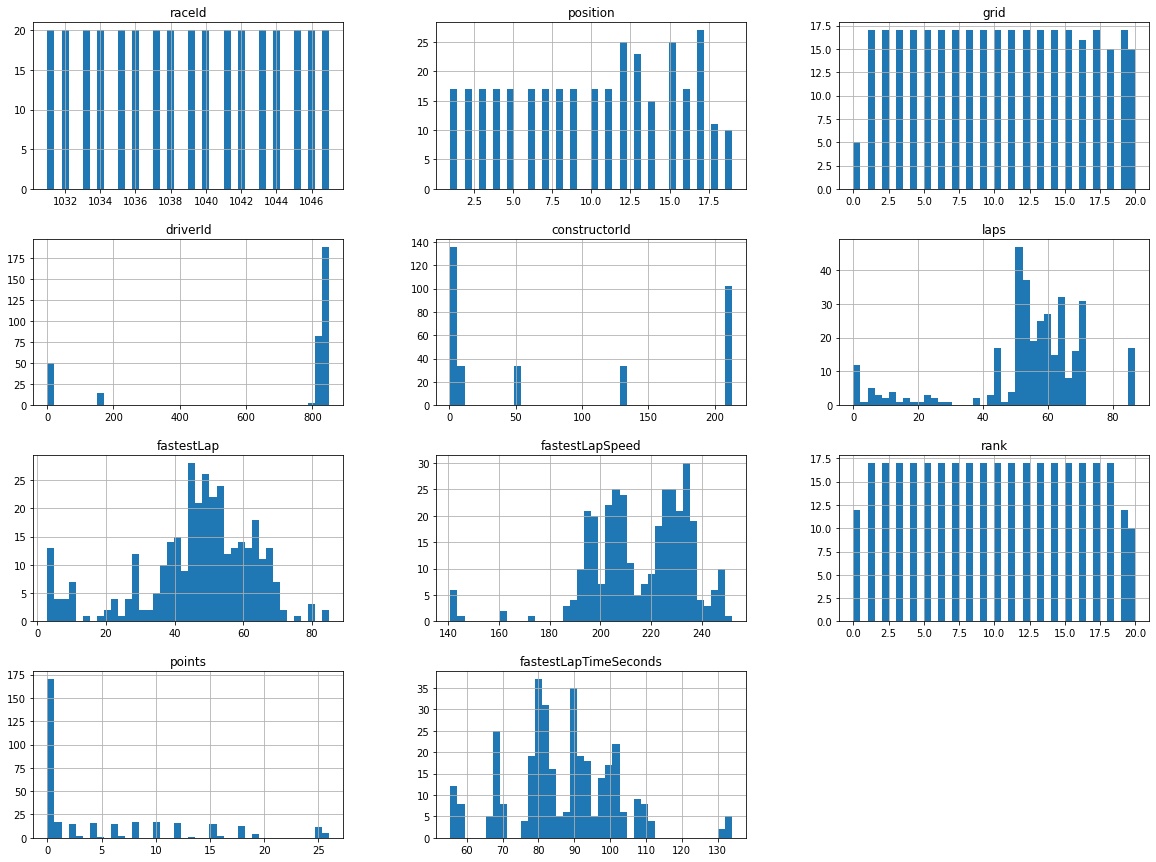

In [15]:
#getting an overview

results_2020.hist(bins= 40, figsize=(20,15))
plt.show()

Text(0, 0.5, 'grid position')

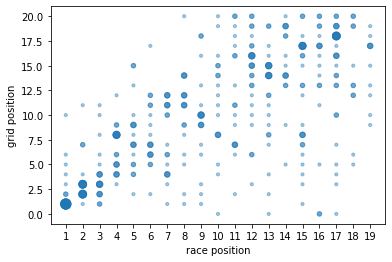

In [14]:
#More in depth view

#Creating a plot that shows occurence of grid position and resulting race positions

from collections import Counter

c = Counter(zip(results_2020["position"],results_2020["grid"]))
s = [10*c[(xx,yy)] for xx,yy in zip(results_2020["position"],results_2020["grid"])]

plt.scatter(results_2020["position"], results_2020["grid"], s=s, alpha=0.4)
plt.xlabel("race position")
plt.ylabel("grid position")

### Preparing for Linear Model

Before we can apply linear regression, we need to prepare the data. More specifically, we need to 
1. define the dependent variable
2. define the independent variables.
3. make the correct data type that statmodels can work with

The dependent variable in our case is Position.<br>
The other 10 variables are the independent variables.



In [60]:
results_2020.head()

,raceId,position,grid,driverId,constructorId,laps,fastestLap,fastestLapSpeed,rank,points,fastestLapTimeSeconds
24560,1031,1,1,822,131,71,68,229.758,2,25.0,67.657
24621,1031,2,7,844,6,71,64,228.933,4,18.0,67.901
24622,1031,3,3,846,1,71,71,230.378,1,16.0,67.475
24623,1031,4,5,1,131,71,67,229.572,3,12.0,67.712
24624,1031,5,8,832,1,71,63,228.687,5,10.0,67.974


In [62]:
# converting obj Dtypes to int or float Dtypes

results_2020 = results_2020.astype({"position": int,"rank": int, "rank": int, "fastestLap": int, "fastestLapSpeed": float})

In [63]:
results_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 24560 to 24959
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceId                 340 non-null    int64  
 1   position               340 non-null    int32  
 2   grid                   340 non-null    int64  
 3   driverId               340 non-null    int64  
 4   constructorId          340 non-null    int64  
 5   laps                   340 non-null    int64  
 6   fastestLap             340 non-null    int32  
 7   fastestLapSpeed        340 non-null    float64
 8   rank                   340 non-null    int32  
 9   points                 340 non-null    float64
 10  fastestLapTimeSeconds  340 non-null    float64
dtypes: float64(3), int32(3), int64(5)
memory usage: 27.9 KB


In [64]:
corr_matrix = results_2020.corr()
print(corr_matrix)

                             raceId  position      grid  driverId  \
raceId                 1.000000e+00  0.015576  0.015892  0.031472   
position               1.557560e-02  1.000000  0.601045  0.014991   
grid                   1.589182e-02  0.601045  1.000000 -0.056540   
driverId               3.147197e-02  0.014991 -0.056540  1.000000   
constructorId          6.871676e-17  0.029784  0.013631 -0.051360   
laps                   4.389895e-02 -0.374580 -0.068106 -0.065394   
fastestLap            -1.120148e-02 -0.376764 -0.120137 -0.058995   
fastestLapSpeed       -3.054804e-01 -0.176211 -0.084960 -0.047899   
rank                  -1.767342e-02  0.521963  0.486053  0.056301   
points                 2.890357e-15 -0.875154 -0.605038 -0.082631   
fastestLapTimeSeconds  1.882074e-01  0.111898  0.075852  0.013163   

                       constructorId      laps  fastestLap  fastestLapSpeed  \
raceId                  6.871676e-17  0.043899   -0.011201        -0.305480   
position     

In [65]:
# We are only nterested in the correlations of 'position'

corr_matrix = results_2020.corr()
corr_matrix["position"].sort_values(ascending=False)

position                 1.000000
grid                     0.601045
rank                     0.521963
fastestLapTimeSeconds    0.111898
constructorId            0.029784
raceId                   0.015576
driverId                 0.014991
fastestLapSpeed         -0.176211
laps                    -0.374580
fastestLap              -0.376764
points                  -0.875154
Name: position, dtype: float64

### Creating Linear Model

In [66]:
from sklearn import linear_model

# splitting in test and train set 

results_train, results_test = train_test_split(results_2020)

# seperating predictor and dependant variable 

results_names = results_2020.columns.to_list()
results_names.remove("position")

results_train_X = results_train[results_names]
results_train_y = results_train["position"]

results_test_X = results_test[results_names]
results_test_y = results_test["position"]

# Creating and fitting linear model 

results_model = linear_model.LinearRegression()
results_model = results_model.fit(results_train_X, results_train_y,)

In [67]:
print(results_model.score(results_train_X, results_train_y)) # this is R squared 
print(results_model.coef_) # slope coefficients
print(results_model.intercept_) # intercept / constant

0.8254270765192213
[ 0.04754595  0.16229827 -0.0006726   0.00238924 -0.06849729 -0.00693453
 -0.00765944  0.01744084 -0.49975029 -0.05407271]
-27.981587063048742


In [68]:
# Making predictions with training set

pred_y = results_model.predict(results_train_X)

In [69]:
#to calculate errors, results_train_y set needs to be converted to a series of floats, rather than strings

results_train_y = pd.to_numeric(results_train_y, downcast="float")

#claculating errors and mean

errors= results_train_y.to_numpy(dtype = np.dtype, copy=False) - pred_y

abserrors = abs(errors)

mean_abs_errors = abserrors.mean()

mean_y = results_train_y.mean()

squarederrors = errors**2
mean_squared_errors = squarederrors.mean()

root_mean_squared_error = mean_squared_errors**(1/2)

print('Mean absolute errors is:', mean_abs_errors)
print ("   ") # just for spacing
print('Mean squared errors is:', mean_squared_errors)
print ("   ") # just for spacing
print('Root mean squared error is:', root_mean_squared_error)
print ("   ") # just for spacing
print('The average y is:', mean_y)

Mean absolute errors is: 1.825086168361918
   
Mean squared errors is: 4.990688857175208
   
Root mean squared error is: 2.233984972459575
   
The average y is: 9.984314


In [70]:
# calculating model scores 

print(results_model.score(results_train_X, results_train_y))
results_model.coef_

0.8254270783245631


array([ 0.04754595,  0.16229827, -0.0006726 ,  0.00238924, -0.06849729,
       -0.00693453, -0.00765944,  0.01744084, -0.49975029, -0.05407271])

### Forward search to optimize model

In [71]:
#testing a model with only grid variable, since it correlates most with race position

results_model = results_model.fit(results_train_X[['grid']], results_train_y)

N = len(results_train_X)
P = 1    

R2 = results_model.score(results_train_X[['grid']], results_train_y)
R2_adj = 1-(N-1)/(N-P-1)*(1-R2)

print(R2_adj)

0.40475691343694553


In [72]:
#defining list with column names 

col_names = results_train_X.columns
col_names = col_names.tolist()
print(col_names)

# Remove the variable that we already have
col_names.remove('grid')

['raceId', 'grid', 'driverId', 'constructorId', 'laps', 'fastestLap', 'fastestLapSpeed', 'rank', 'points', 'fastestLapTimeSeconds']


In [73]:
# Testing wich variable gives most value in addition to grid

Results = pd.DataFrame({'Variable':[], 'R2_adj':[]})

for col in col_names:
    
    variables = ['grid',col]
    P = len(variables)
    
    
    results_model = results_model.fit(results_train_X[variables], results_train_y)
    pred_y = results_model.predict(results_train_X[variables])
    
    R2 = results_model.score(results_train_X[variables], results_train_y)
    R2_adj = 1-(N-1)/(N-P-1)*(1-R2)

    
    Results.loc[Results.shape[0]] = [col, R2_adj]
        
    print(variables, R2_adj)   # You can leave this away when you know that it works
    
    
print(Results[Results['R2_adj']==Results['R2_adj'].max()])

['grid', 'raceId'] 0.4024869760167271
['grid', 'driverId'] 0.41177435410223484
['grid', 'constructorId'] 0.4033325906609514
['grid', 'laps'] 0.5078060904581235
['grid', 'fastestLap'] 0.489840035981977
['grid', 'fastestLapSpeed'] 0.40821449909281227
['grid', 'rank'] 0.44571566099706184
['grid', 'points'] 0.7756996507304736
['grid', 'fastestLapTimeSeconds'] 0.40267942709469584
  Variable  R2_adj
7   points  0.7757


In [74]:
# Again, removing the variable that we already have 
col_names.remove('points')

In [75]:
#same as above, but with points

for col in col_names:
    
    variables = ['points',col]
    P = len(variables)
    
    
    results_model = results_model.fit(results_train_X[variables], results_train_y)
    pred_y = results_model.predict(results_train_X[variables])
    
    R2 = results_model.score(results_train_X[variables], results_train_y)
    R2_adj = 1-(N-1)/(N-P-1)*(1-R2)

    
    Results.loc[Results.shape[0]] = [col, R2_adj]
        
    print(variables, R2_adj)   # You can leave this away when you know that it works
    
    
print(Results[Results['R2_adj']==Results['R2_adj'].max()])

['points', 'raceId'] 0.7615983401340092
['points', 'driverId'] 0.7644059354023061
['points', 'constructorId'] 0.7632871703838151
['points', 'laps'] 0.7891527806020405
['points', 'fastestLap'] 0.7797376331995601
['points', 'fastestLapSpeed'] 0.7614710875140704
['points', 'rank'] 0.7633031179364307
['points', 'fastestLapTimeSeconds'] 0.7617741400768361
   Variable    R2_adj
12     laps  0.789153


In [76]:
# Again, removing the variable that we already have 
col_names.remove('laps')

In [77]:
#same as above, but with laps

for col in col_names:
    
    variables = ['laps',col]
    P = len(variables)
    
    
    results_model = results_model.fit(results_train_X[variables], results_train_y)
    pred_y = results_model.predict(results_train_X[variables])
    
    R2 = results_model.score(results_train_X[variables], results_train_y)
    R2_adj = 1-(N-1)/(N-P-1)*(1-R2)

    
    Results.loc[Results.shape[0]] = [col, R2_adj]
        
    print(variables, R2_adj)   # You can leave this away when you know that it works
    
    
print(Results[Results['R2_adj']==Results['R2_adj'].max()])

['laps', 'raceId'] 0.13719676749056664
['laps', 'driverId'] 0.13899913801114216
['laps', 'constructorId'] 0.13676119887020222
['laps', 'fastestLap'] 0.15050224042649663
['laps', 'fastestLapSpeed'] 0.14055596334282017
['laps', 'rank'] 0.36760382175437933
['laps', 'fastestLapTimeSeconds'] 0.15466968457000074
   Variable    R2_adj
12     laps  0.789153


At this point, the adjusted R-squared does not increase anymore. THe optimal model is reached using the following variables:
- grid
- points
- laps 



# THE END